In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from numpy import linalg as LA
import scipy as sp
import sympy
from scipy import stats

## Import the data

In [2]:
data = np.genfromtxt('Test1.txt', delimiter=' ') ## time-series
data

array([ 0.01      ,  0.05311953, -0.02139409, ...,  1.06371739,
        1.0869685 ,  1.15524983])

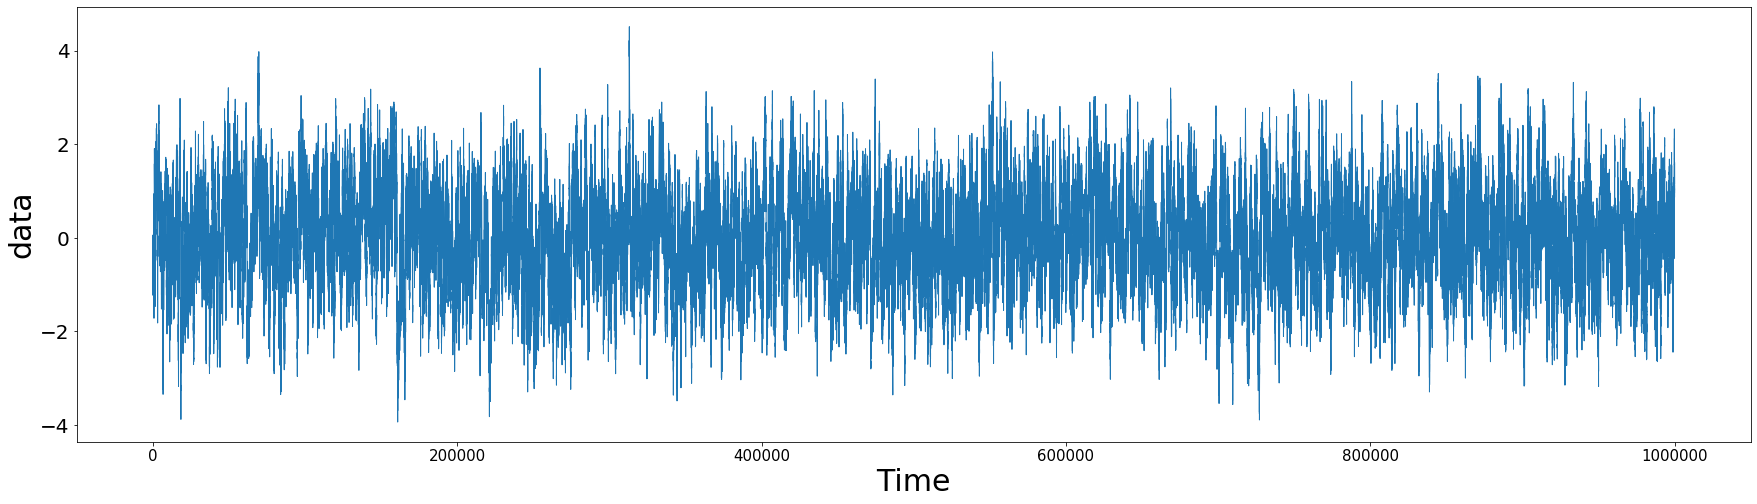

In [33]:
## plotting the data versos time (data is a time-series x(t))

plt.figure(figsize=(30,8))
plt.plot(data,linewidth=1)
plt.xlabel("Time", fontsize="30")
plt.ylabel("data", fontsize="30")
plt.xticks(fontsize="15")
plt.yticks(fontsize="20")
plt.savefig("data.pdf")

## The conditional moments

\begin{align}
&K^{(n)}(x',t,\tau)=\langle[x(t+\tau)-x(t)]^n\rangle|_{x(t)=x'}\\
&dt = 0.001\\
&n=[0.1,0.2,0.3,...,1,2,3,4,5,6]
\end{align}

In [294]:
data = pd.read_csv('Test1.txt', sep=" ", header=None)

In [295]:
N = 500001
Np=int(N/4)
mean1=np.zeros(Np)
mean2=np.zeros(Np)
mean3=np.zeros(Np)
mean4=np.zeros(Np)
mean5=np.zeros(Np)
mean6=np.zeros(Np)
mean7=np.zeros(Np)
mean8=np.zeros(Np)
mean9=np.zeros(Np)
mean10=np.zeros(Np)
mean11=np.zeros(Np)
mean12=np.zeros(Np)
mean13=np.zeros(Np)
mean14=np.zeros(Np)
mean15=np.zeros(Np)

n1 = np.linspace(0.1,1,num=10)
n2 = np.linspace(2,6,num=5)
n  = np.concatenate((n1, n2), axis=0)

In [2]:
## calculate the S_K or conditional moments with pandas
for k in range(n):
    for i in range(Np):
        data1 = data.diff(periods=i) # calculate the x(t+tau)-x(t)
        dat = data1.to_numpy()
        dat  = np.abs(dat[i:])
        dat = np.power(dat,k) ## different k in list n.
        mean1[i]=np.average(dat) ## average on x, final result is conditional moment as a function of x.


'\nfor i in range(Np):\n    data1 = data.diff(periods=i)\n    dat = data1.to_numpy()\n    dat  = np.abs(dat[i:])\n    dat = np.power(dat,0.1)\n    mean1[i]=np.average(dat)\n'

In [ ]:
## in this section i choose the part of the S_K that is linear

mean1p = mean1[2:120]
mean2p = mean2[2:120]
mean3p = mean3[2:120]
mean4p = mean4[2:120]
mean5p = mean5[2:120]
mean6p = mean6[2:120]
mean7p = mean7[2:120]
mean8p = mean8[2:120]
mean9p = mean9[2:120]
mean10p = mean10[2:120]
mean11p = mean11[2:120]
mean12p = mean12[2:120]
mean13p = mean13[2:120]
mean14p = mean14[2:120]
mean15p = mean15[2:120]

Np2=int(N/20)
taua=np.linspace(0,Np,num=len(mean2))
taub=np.linspace(0,Np2,num=len(mean5))
tau1=taua[2:120]
tau2=taub[2:120]

In [ ]:
## different method with loop

In [49]:
### Not efficient for large data

N  = len(data)
Np =int(N/4)
tau=0.001
n1 = np.linspace(0.1,1,num=10)
n2 = np.linspace(2,6,num=5)
n  = np.concatenate((n1, n2), axis=0)

t = np.arange(0,Np,1)

In [54]:

## calculate the S_K or conditional moments
K=[]

for i in range(0,1000):
    a=0
    c = 0
    for j in range(0,N-i):
       
        a += ((np.abs((data[i+j])-data[j]))**2)
        c = c + 1
    K = np.append(K,a/c  )      


## Drift and Diffusion 

In [3]:
data = np.genfromtxt('Test1.txt', delimiter=' ') ## time-series

In [4]:
N = len(data)
nbins = 51  ## number of bins.

# range of data 
Min = np.min(data) - (np.max(data)-np.min(data))/nbins*0.5
Max = np.max(data) + (np.max(data)-np.min(data))/nbins*0.5
# bin borders
X_bins = np.linspace(np.min(data),np.max(data),nbins)


def Bin(value):
    return int((value-Min)/(Max-Min)*nbins)

    
coef = [ [] for _ in range(nbins) ]
    
    
for j in range(N-1):
    
    difference = data[j+1]-data[j]
    t = Bin(data[j])
    coef[t].append(difference)
    

for i in range(nbins):
    coef[i] = np.array(coef[i])

In [5]:
drift = np.array([ np.mean(coef[i]**1)/1 for i in range(nbins) ])
std_drift = np.array([ stats.sem(coef[i]**1)/1 for i in range(nbins) ]) # error bars for drift

diffusion = np.array([ np.mean(coef[i]**2)/1 for i in range(nbins) ])
std_diffusion = np.array([ stats.sem(coef[i]**2)/1 for i in range(nbins) ]) # error bars for diffusion

In [6]:
X_bins = X_bins[5:196]
drift = drift[5:196]
std_drift = std_drift[5:196]

diffusion = diffusion[5:196]
std_diffusion = std_diffusion[5:196]

In [ ]:
## fit a line to data( calculate the slope)

par = np.polyfit(X_bins, diffusion, 1, full=True)

slope=par[0][0]
intercept=par[0][1]

slope=par[0][0]
intercept=par[0][1]
xl = [min(X_bins), max(X_bins)]
yl = [slope*xx + intercept  for xx in xl]

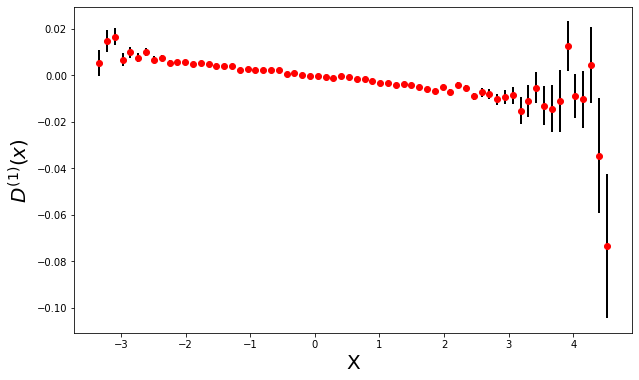

In [9]:
plt.figure(figsize=(10,6))
plt.errorbar(X_bins,drift, yerr=std_drift, fmt='or',color='black',
             ecolor='black', elinewidth=2, capsize=0)
plt.plot(xl, yl, 'green',lw=3)
plt.xlabel("X", fontsize="20")
plt.ylabel(r"$D^{(1)}(x)$", fontsize="20")
plt.savefig("drift.pdf")

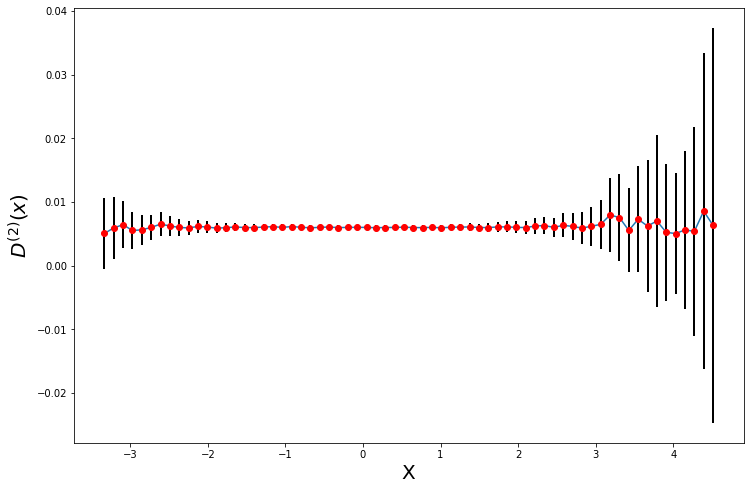

In [11]:
plt.figure(figsize=(12,8))
plt.errorbar(X_bins,diffusion, yerr=std_drift, fmt='or',color='black',
             ecolor='black', elinewidth=2, capsize=0)

plt.plot(xl, yl, 'green',lw=3)
plt.plot(X_bins,diffusion)
plt.xlabel("X", fontsize="20")
plt.ylabel(r"$D^{(2)}(x)$", fontsize="20")
plt.savefig("diffusion.pdf")